In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.read_csv('1,2,3월_2.csv')
data

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,598167,201901,카페,20s,2,1,3,24890,3
1,598168,201901,카페,20s,2,1,3,17800,3
2,598169,201901,카페,30s,2,2,3,28500,4
3,598170,201901,카페,20s,1,1,3,27900,4
4,598171,201901,카페,40s,1,3,3,20600,3
...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20s,1,1,8,904800,16
224536,23899429,202003,일반 음식점업,30s,1,1,3,331800,4
224537,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28
224538,23899431,202003,일반 음식점업,40s,1,3,3,73000,3


In [45]:
data_ = data.drop(['Unnamed: 0'], axis=1, inplace=False)

In [46]:
data_a=data_
data_a['연령대'] = data_a['연령대'].str.rstrip('s').astype('int')
data_a

,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,201901,카페,20,2,1,3,24890,3
1,201901,카페,20,2,1,3,17800,3
2,201901,카페,30,2,2,3,28500,4
3,201901,카페,20,1,1,3,27900,4
4,201901,카페,40,1,3,3,20600,3
...,...,...,...,...,...,...,...,...
224535,202003,일반 음식점업,20,1,1,8,904800,16
224536,202003,일반 음식점업,30,1,1,3,331800,4
224537,202003,일반 음식점업,30,1,2,7,1153000,28
224538,202003,일반 음식점업,40,1,3,3,73000,3


In [47]:
data.업종명.unique()

array(['카페', '스포츠 및 레크레이션 용품 임대업', '일반 음식점업', '전시 및 행사 대행업', '관광업'],
      dtype=object)

In [48]:
data_cafe = data_a[data_a['업종명']=='카페']
data_sports = data_a[data_a['업종명']=='스포츠 및 레크레이션 용품 임대업']
data_food = data_a[data_a['업종명']=='일반 음식점업']
data_display = data_a[data_a['업종명']=='전시 및 행사 대행업']
data_tour = data_a[data_a['업종명']=='관광업']

In [49]:
# 불필요한 열 삭제
data_cafe = data_cafe.drop(['업종명','년월'], axis=1, inplace=False)
data_sports = data_sports.drop(['업종명','년월'], axis=1, inplace=False)
data_food = data_food.drop(['업종명','년월'], axis=1, inplace=False)
data_display = data_display.drop(['업종명','년월'], axis=1, inplace=False)
data_tour = data_tour.drop(['업종명','년월'], axis=1, inplace=False)

In [50]:
# bias 위한 상수항 추가
data_cafe = sm.add_constant(data_cafe, has_constant="add")
data_sports = sm.add_constant(data_sports, has_constant="add")
data_food = sm.add_constant(data_food, has_constant="add")
data_display = sm.add_constant(data_display, has_constant="add")
data_tour = sm.add_constant(data_tour, has_constant="add")

data_tour

,const,연령대,성별,생애주기,고객수,금액,건수
1961,1.0,50,1,4,3,218000,3
2440,1.0,50,1,4,3,4844400,3
3687,1.0,50,1,4,6,420500,6
3688,1.0,50,2,4,4,217500,4
7074,1.0,60,1,5,3,272000,3
...,...,...,...,...,...,...,...
221295,1.0,40,2,3,4,30000,5
221296,1.0,50,1,4,6,90000,13
221297,1.0,50,2,4,6,53000,7
221298,1.0,60,1,5,11,160000,14


In [51]:
# 설명변수(X) 와 타겟변수(y)를 분리 / 학습데이터와 평가데이터를 분할

# 타겟변수 : 금액
feature_columns_cafe = data_cafe.columns.difference(['금액'])
feature_columns_sports = data_sports.columns.difference(['금액'])
feature_columns_food = data_food.columns.difference(['금액'])
feature_columns_display = data_display.columns.difference(['금액'])
feature_columns_tour = data_tour.columns.difference(['금액'])

X_cafe = data_cafe[feature_columns_cafe]
y_cafe = data_cafe.금액

X_sports = data_sports[feature_columns_sports]
y_sports = data_sports.금액

X_food = data_food[feature_columns_food]
y_food = data_food.금액

X_display = data_display[feature_columns_display]
y_display = data_display.금액

X_tour = data_tour[feature_columns_tour]
y_tour = data_tour.금액


train_x_cafe, test_x_cafe, train_y_cafe, test_y_cafe = train_test_split(X_cafe, y_cafe, train_size = 0.7, test_size=0.3)
print(train_x_cafe.shape, test_x_cafe.shape, train_y_cafe.shape, test_y_cafe.shape)

train_x_sports, test_x_sports, train_y_sports, test_y_sports = train_test_split(X_sports, y_sports, train_size = 0.7, test_size=0.3)
print(train_x_sports.shape, test_x_sports.shape, train_y_sports.shape, test_y_sports.shape)

train_x_food, test_x_food, train_y_food, test_y_food = train_test_split(X_food, y_food, train_size = 0.7, test_size=0.3)
print(train_x_food.shape, test_x_food.shape, train_y_food.shape, test_y_food.shape)

train_x_display, test_x_display, train_y_display, test_y_display = train_test_split(X_display, y_display, train_size = 0.7, test_size=0.3)
print(train_x_display.shape, test_x_display.shape, train_y_display.shape, test_y_display.shape)

train_x_tour, test_x_tour, train_y_tour, test_y_tour = train_test_split(X_tour, y_tour, train_size = 0.7, test_size=0.3)
print(train_x_tour.shape, test_x_tour.shape, train_y_tour.shape, test_y_tour.shape)

(25249, 6) (10821, 6) (25249,) (10821,)
(7910, 6) (3391, 6) (7910,) (3391,)
(115981, 6) (49707, 6) (115981,) (49707,)
(4351, 6) (1866, 6) (4351,) (1866,)
(3684, 6) (1580, 6) (3684,) (1580,)


# 5가지 업종들의 모든 변수를 선택한 model

### 1) cafe

In [52]:
# cafe train & 회귀모델 적합

full_model_cafe = sm.OLS(train_y_cafe, train_x_cafe)
fitted_full_model_cafe = full_model_cafe.fit()

fitted_full_model_cafe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.667e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:43   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25243   BIC:                         7.322e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.507e+05   1.32e+04    -11.413      0.000   -1.77e+05   -1.25e+05
건수           845.4997     64.875     13.033      0.000     718.340     972.659
고객수         1.067e+04    104.732    101.898      0.000    1.05e+04    1.09e+04
생애주기        1.339e+04   6613.168      2.024      0.043     424.436    2.63e+04
성별           276.5807   6084.098      0.045      0.964   -1.16e+04    1.22e+04
연령대         3661.6523    637.740      5.742      0.000    2411.645    4911.660
==============================================================================
Omnibus:                    44364.682   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404013048.735
Skew:                          11.643   Prob(JB):                         0.00
Kurtosis:                     622.262   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2) sports

In [53]:
# sports train & 회귀모델 적합

full_model_sports = sm.OLS(train_y_sports, train_x_sports)
fitted_full_model_sports = full_model_sports.fit()

fitted_full_model_sports.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:45   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7904   BIC:                         2.553e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.81e+06   1.17e+05    -15.476      0.000   -2.04e+06   -1.58e+06
건수          4.575e+04   2432.163     18.809      0.000     4.1e+04    5.05e+04
고객수         6.984e+04   3042.199     22.956      0.000    6.39e+04    7.58e+04
생애주기        2.879e+05   5.79e+04      4.972      0.000    1.74e+05    4.01e+05
성별          1.795e+05   5.64e+04      3.181      0.001    6.89e+04     2.9e+05
연령대         1.355e+04   5397.107      2.510      0.012    2968.405    2.41e+04
==============================================================================
Omnibus:                     2973.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454606.583
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) food

In [54]:
# food train & 회귀모델 적합

full_model_food = sm.OLS(train_y_food, train_x_food)
fitted_full_model_food = full_model_food.fit()

fitted_full_model_food.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.326e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:46   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115975   BIC:                         3.838e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.697e+05   4.86e+04     -9.668      0.000   -5.65e+05   -3.74e+05
건수          3.919e+04    175.273    223.605      0.000    3.88e+04    3.95e+04
고객수        -9751.2978    264.086    -36.925      0.000   -1.03e+04   -9233.693
생애주기        1.146e+05   2.37e+04      4.835      0.000    6.81e+04    1.61e+05
성별         -3.494e+05   2.27e+04    -15.383      0.000   -3.94e+05   -3.05e+05
연령대         1.239e+04   2302.598      5.380      0.000    7875.307    1.69e+04
==============================================================================
Omnibus:                    86735.767   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2112870930.592
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                     664.216   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4) display

In [55]:
# display train & 회귀모델 적합

full_model_display = sm.OLS(train_y_display, train_x_display)
fitted_full_model_display = full_model_display.fit()

fitted_full_model_display.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     3695.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:47   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4345   BIC:                         1.224e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.66e+05   2.66e+04    -13.771      0.000   -4.18e+05   -3.14e+05
건수         -1.444e+04   1612.856     -8.953      0.000   -1.76e+04   -1.13e+04
고객수         6.283e+04   1872.847     33.546      0.000    5.92e+04    6.65e+04
생애주기        1460.6683   1.68e+04      0.087      0.931   -3.14e+04    3.44e+04
성별          4.134e+04   9579.808      4.315      0.000    2.26e+04    6.01e+04
연령대         4307.0315   1656.674      2.600      0.009    1059.106    7554.957
==============================================================================
Omnibus:                     5591.763   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3725119.056
Skew:                           6.524   Prob(JB):                         0.00
Kurtosis:                     145.749   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5) tour

In [56]:
# tour train & 회귀모델 적합

full_model_tour = sm.OLS(train_y_tour, train_x_tour)
fitted_full_model_tour = full_model_tour.fit()

fitted_full_model_tour.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     396.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:47   Log-Likelihood:                -58695.
No. Observations:                3684   AIC:                         1.174e+05
Df Residuals:                    3678   BIC:                         1.174e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.281e+04   1.73e+05      0.132      0.895   -3.15e+05    3.61e+05
건수         -8.221e+04   7542.932    -10.900      0.000    -9.7e+04   -6.74e+04
고객수         2.389e+05   1.16e+04     20.680      0.000    2.16e+05    2.62e+05
생애주기       -3.107e+04   9.91e+04     -0.314      0.754   -2.25e+05    1.63e+05
성별         -1.865e+05   6.76e+04     -2.758      0.006   -3.19e+05   -5.39e+04
연령대         2258.2664   9319.562      0.242      0.809    -1.6e+04    2.05e+04
==============================================================================
Omnibus:                     4784.523   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1179538.533
Skew:                           7.074   Prob(JB):                         0.00
Kurtosis:                      89.511   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

# 5가지 업종의 q-q plot

### q-q plot은 잔차의 정규성을 확인할때 쓰는 그래프로,  y=x 형태를 띄면 정규성을 보임

- 우리는 이상치가 너무 많아서 이런 모양인가봐!

### 1) cafe

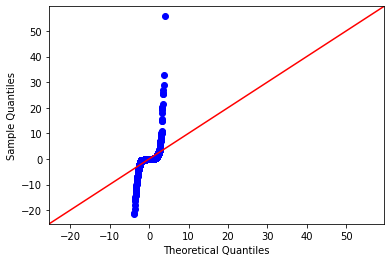

In [57]:
# 학습데이터의 잔차 확인
res_cafe = fitted_full_model_cafe.resid

# q-q plot을 통해 잔차의 정규분포 확인
fig = sm.qqplot(res_cafe, fit=True, line='45')

### 2) sports

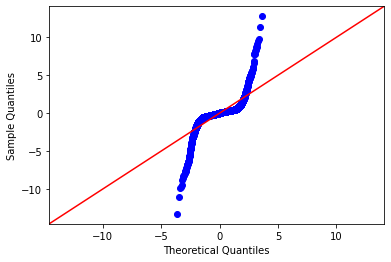

In [58]:
# 학습데이터의 잔차 확인
res_sports = fitted_full_model_sports.resid

# q-q plot을 통해 잔차의 정규분포 확인
fig = sm.qqplot(res_sports, fit=True, line='45')

### 3) food

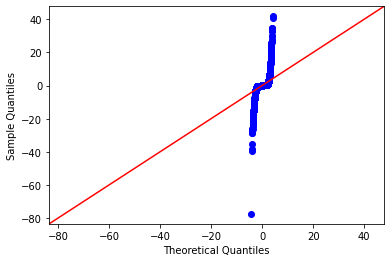

In [59]:
# 학습데이터의 잔차 확인
res_food= fitted_full_model_food.resid

# q-q plot을 통해 잔차의 정규분포 확인
fig = sm.qqplot(res_food, fit=True, line='45')

### 4) display

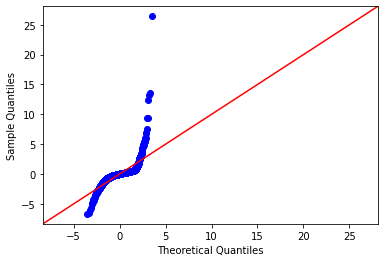

In [60]:
# 학습데이터의 잔차 확인
res_display = fitted_full_model_display.resid

# q-q plot을 통해 잔차의 정규분포 확인
fig = sm.qqplot(res_display, fit=True, line='45')

### 5) tour

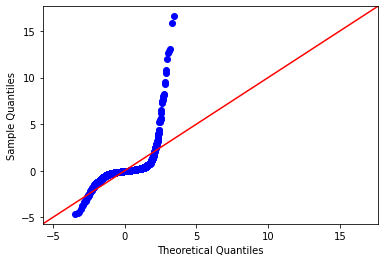

In [61]:
# 학습데이터의 잔차 확인
res_tour = fitted_full_model_tour.resid

# q-q plot을 통해 잔차의 정규분포 확인
fig = sm.qqplot(res_tour, fit=True, line='45')

## 변수 선택법
- 전체 경우의 수
- 전진 선택법
- 후진 소거법
- 단계적 선택법

## (함수 정의)
## 1) 전체 경우의 수
### 모든 경우의 수를 실행해 단순히 aic가 가장 낮은 모델 선택하는 방법

In [62]:
# 변수선택을 통해 형성한 모델의 aic 구하는 함수
# aic가 낮을수록 모델이 좋다고 평가

def processSubset(X, y ,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) #Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # models' AIC
    return {'model' : regr, 'AIC' : AIC}

In [63]:
import time
import itertools

#getBest : 가장 낮은 AIC 를 가지는 모델을 선택하고 저장하는 함수

def getBest(X, y, k):
    tic = time.time() # 시작시간
    results =[] # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']),k):
                                        # 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
                                        
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time() # 종료시간
    print('Prcessed', models.shape[0], 'models on', k, 'predictors in', (toc-tic), 'seconds')
    return best_model

## 2) 전진 선택법

In [64]:
### 전진 선택법(step=1)

def forward(X,y,predictors):

    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

## 3) 후진 소거법

In [65]:
### 후진소거법(step=1)

def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model
    
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=X, y= y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])

## 4) 단계적 선택법

In [66]:
### 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

# CAFE

In [67]:
# 모든 변수를 사용한 cafe의 회귀모델 적합

full_model_cafe = sm.OLS(train_y_cafe, train_x_cafe)
fitted_full_model_cafe = full_model_cafe.fit()

fitted_full_model_cafe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.667e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:01   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25243   BIC:                         7.322e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.507e+05   1.32e+04    -11.413      0.000   -1.77e+05   -1.25e+05
건수           845.4997     64.875     13.033      0.000     718.340     972.659
고객수         1.067e+04    104.732    101.898      0.000    1.05e+04    1.09e+04
생애주기        1.339e+04   6613.168      2.024      0.043     424.436    2.63e+04
성별           276.5807   6084.098      0.045      0.964   -1.16e+04    1.22e+04
연령대         3661.6523    637.740      5.742      0.000    2411.645    4911.660
==============================================================================
Omnibus:                    44364.682   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404013048.735
Skew:                          11.643   Prob(JB):                         0.00
Kurtosis:                     622.262   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# 모든 변수를 사용한 cafe의 회귀모델 적합

full_model_cafe_1 = sm.OLS(y_cafe, X_cafe)
fitted_full_model_cafe_1 = full_model_cafe_1.fit()

fitted_full_model_cafe_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.937e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:02   Log-Likelihood:            -5.2200e+05
No. Observations:               36070   AIC:                         1.044e+06
Df Residuals:                   36064   BIC:                         1.044e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.538e+05   1.08e+04    -14.234      0.000   -1.75e+05   -1.33e+05
건수           778.4693     52.236     14.903      0.000     676.086     880.853
고객수         1.074e+04     84.050    127.790      0.000    1.06e+04    1.09e+04
생애주기        1.488e+04   5401.510      2.755      0.006    4293.805    2.55e+04
성별          1283.7650   4957.572      0.259      0.796   -8433.223     1.1e+04
연령대         3614.5068    522.327      6.920      0.000    2590.731    4638.283
==============================================================================
Omnibus:                    60761.453   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        472984919.025
Skew:                          10.632   Prob(JB):                         0.00
Kurtosis:                     563.588   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# cafe VIF로 다중공선성 확인

vif_cafe=pd.DataFrame()
vif_cafe['VIF Factor'] = [variance_inflation_factor(data_cafe.values, i) for i in range(data_cafe.shape[1])]
vif_cafe['features'] = data_cafe.columns
vif_cafe

,VIF Factor,features
0,19.452794,const
1,8.681696,연령대
2,1.012088,성별
3,8.657437,생애주기
4,140.659465,고객수
5,55.586846,금액
6,97.383132,건수


***

## 1) 전체 경우의 수

In [70]:
print("카페:", processSubset(X = train_x_cafe, y=train_y_cafe, feature_set = feature_columns_cafe))

카페: {'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029BA0F488>, 'AIC': 732187.8391197859}


In [71]:
# 카페 변수 선택에 따른 학습시간과 저장
models_cafe = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_cafe.loc[i] = getBest(X=train_x_cafe, y=train_y_cafe, k=i)
toc = time.time()
print('카페 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.021035194396972656 seconds
Prcessed 10 models on 2 predictors in 0.039998769760131836 seconds
Prcessed 10 models on 3 predictors in 0.04999995231628418 seconds
Prcessed 5 models on 4 predictors in 0.044001102447509766 seconds
Prcessed 1 models on 5 predictors in 0.008002519607543945 seconds
카페 Total elapsed time: 0.1880335807800293 seconds


In [72]:
# 카페 변수 선택에 따른 학습시간과 저장
models_cafe_1 = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_cafe_1.loc[i] = getBest(X=X_cafe, y=y_cafe, k=i)
toc = time.time()
print('카페 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.025981903076171875 seconds
Prcessed 10 models on 2 predictors in 0.05700206756591797 seconds
Prcessed 10 models on 3 predictors in 0.09699892997741699 seconds
Prcessed 5 models on 4 predictors in 0.04100823402404785 seconds
Prcessed 1 models on 5 predictors in 0.010003089904785156 seconds
카페 Total elapsed time: 0.25498199462890625 seconds


In [73]:
# 선택된 변수의 개수(1,2,3,4,5) 별 가장 낮음 AIC를 보유한 모델들이 들어있는 data frame
models_cafe

,AIC,model
1,732818.234121,<statsmodels.regression.linear_model.Regressio...
2,732354.802505,<statsmodels.regression.linear_model.Regressio...
3,732187.954028,<statsmodels.regression.linear_model.Regressio...
4,732185.841187,<statsmodels.regression.linear_model.Regressio...
5,732187.839120,<statsmodels.regression.linear_model.Regressio...


In [74]:
models_cafe_1

,AIC,model
1,1.044953e+06,<statsmodels.regression.linear_model.Regressio...
2,1.044225e+06,<statsmodels.regression.linear_model.Regressio...
3,1.044006e+06,<statsmodels.regression.linear_model.Regressio...
4,1.044001e+06,<statsmodels.regression.linear_model.Regressio...
5,1.044003e+06,<statsmodels.regression.linear_model.Regressio...


In [75]:
# 가장 AIC가 낮은 4번째 모델의 OLS 결과 출력
models_cafe.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.334e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:09   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25244   BIC:                         7.322e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수           845.3158     64.748     13.056      0.000     718.407     972.225
고객수         1.067e+04    104.499    102.128      0.000    1.05e+04    1.09e+04
생애주기         1.34e+04   6607.375      2.028      0.043     448.230    2.63e+04
연령대         3659.9263    636.596      5.749      0.000    2412.160    4907.692
const      -1.503e+05   9198.581    -16.337      0.000   -1.68e+05   -1.32e+05
==============================================================================
Omnibus:                    44364.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404002731.499
Skew:                          11.642   Prob(JB):                         0.00
Kurtosis:                     622.254   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# 가장 AIC가 낮은 4번째 모델의 OLS 결과 출력
models_cafe.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.334e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:10   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25244   BIC:                         7.322e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수           845.3158     64.748     13.056      0.000     718.407     972.225
고객수         1.067e+04    104.499    102.128      0.000    1.05e+04    1.09e+04
생애주기         1.34e+04   6607.375      2.028      0.043     448.230    2.63e+04
연령대         3659.9263    636.596      5.749      0.000    2412.160    4907.692
const      -1.503e+05   9198.581    -16.337      0.000   -1.68e+05   -1.32e+05
==============================================================================
Omnibus:                    44364.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404002731.499
Skew:                          11.642   Prob(JB):                         0.00
Kurtosis:                     622.254   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# 모든 변수를 모델링 한것과 비교
print("full model Adj.Rsquared:","{:.5f}".format(fitted_full_model_cafe.rsquared_adj))
print("full model AIC:","{:.5f}".format(fitted_full_model_cafe.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model_cafe.mse_total))

print("selected model Adj.Rsquared:","{:.5f}".format(models_cafe.loc[4,"model"].rsquared_adj))
print("selected model AIC:","{:.5f}".format(models_cafe.loc[4,"model"].aic))
print("selected model MSE:","{:.5f}".format(models_cafe.loc[4,"model"].mse_total))

full model Adj.Rsquared: 0.98142
full model AIC: 732187.83912
full model MSE: 12370206798766.04492
selected model Adj.Rsquared: 0.98142
selected model AIC: 732185.84119
selected model MSE: 12370206798766.04492


- ① 모든 변수를 선택한 model
- 건수, 고객수, 생애주기, 성별, 연령대
- '성별' 변수가 유의하지 않음


- ② 변수 4가지 선택한 model
- 건수, 고객수, 생애주기, 연령대
- 모든 변수가 유의함


- adj. r-squared는 같다
- aic : ②번 model이 더 낮다
- mse : 같다

### aic가 더 낮고 모든 변수가 유의한 ②번 model이 더 좋다

***

## 2) 전진 선택법

In [78]:
Forward_best_model = forward_model(X=train_x_cafe, y=train_y_cafe)

Processed  5 models on 1 predictors in 0.019037961959838867
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A93E388>
Processed  4 models on 2 predictors in 0.02000117301940918
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A941D48>
Processed  3 models on 3 predictors in 0.01700139045715332
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A910188>
Processed  2 models on 4 predictors in 0.014999866485595703
Selected predictors: ['고객수', '연령대', '건수', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A941048>
Processed  1 models on 5 predictors in 0.009004831314086914
Selected predictors: ['고객수', '연령대', '건수', '생애주기', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.Regressio

In [79]:
Forward_best_model_1 = forward_model(X=X_cafe, y=y_cafe)

Processed  5 models on 1 predictors in 0.02803492546081543
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A941788>
Processed  4 models on 2 predictors in 0.020001649856567383
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A948548>
Processed  3 models on 3 predictors in 0.021001815795898438
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A946F48>
Processed  2 models on 4 predictors in 0.017999887466430664
Selected predictors: ['고객수', '연령대', '건수', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A948C08>
Processed  1 models on 5 predictors in 0.011000871658325195
Selected predictors: ['고객수', '연령대', '건수', '생애주기', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.Regressi

In [80]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model.model.exog_names)
print(Forward_best_model.aic)

['고객수', '연령대', '건수', '생애주기', 'const']
732185.8411868532


In [81]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model_1.model.exog_names)
print(Forward_best_model_1.aic)

['고객수', '연령대', '건수', '생애주기', 'const']
1044000.6490818263


In [82]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.334e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:16   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25244   BIC:                         7.322e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         1.067e+04    104.499    102.128      0.000    1.05e+04    1.09e+04
연령대         3659.9263    636.596      5.749      0.000    2412.160    4907.692
건수           845.3158     64.748     13.056      0.000     718.407     972.225
생애주기         1.34e+04   6607.375      2.028      0.043     448.230    2.63e+04
const      -1.503e+05   9198.581    -16.337      0.000   -1.68e+05   -1.32e+05
==============================================================================
Omnibus:                    44364.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404002731.499
Skew:                          11.642   Prob(JB):                         0.00
Kurtosis:                     622.254   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

## 3) 후진 소거법

In [83]:
Backward_best_model = backward_model(X=train_x_cafe, y= train_y_cafe)

Processed  5 models on 4 predictors in 0.030954360961914062
Selected predictors: ['건수', '고객수', '생애주기', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A951748>
Processed  4 models on 3 predictors in 0.02000117301940918
Selected predictors: ['건수', '고객수', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029C59FE88>
Total elapsed time: 0.06596803665161133 seconds.


In [84]:
Backward_best_model_1 = backward_model(X=X_cafe, y= y_cafe)

Processed  5 models on 4 predictors in 0.04400062561035156
Selected predictors: ['건수', '고객수', '생애주기', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A95A848>
Processed  4 models on 3 predictors in 0.030999422073364258
Selected predictors: ['건수', '고객수', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A95E208>
Total elapsed time: 0.09797883033752441 seconds.


In [85]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model.model.exog_names)
print(Backward_best_model.aic)

['건수', '고객수', '생애주기', '연령대', 'const']
732185.8411868532


In [86]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model_1.model.exog_names)
print(Backward_best_model_1.aic)

['건수', '고객수', '생애주기', '연령대', 'const']
1044000.6490818263


In [87]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.334e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:22   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25244   BIC:                         7.322e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수           845.3158     64.748     13.056      0.000     718.407     972.225
고객수         1.067e+04    104.499    102.128      0.000    1.05e+04    1.09e+04
생애주기         1.34e+04   6607.375      2.028      0.043     448.230    2.63e+04
연령대         3659.9263    636.596      5.749      0.000    2412.160    4907.692
const      -1.503e+05   9198.581    -16.337      0.000   -1.68e+05   -1.32e+05
==============================================================================
Omnibus:                    44364.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404002731.499
Skew:                          11.642   Prob(JB):                         0.00
Kurtosis:                     622.254   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

## 4) 단계적 선택법

In [88]:
Stepwise_best_model = Stepwise_model(X=train_x_cafe, y=train_y_cafe)

Processed  5 models on 1 predictors in 0.01596522331237793
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A9713C8>
forward
Processed  1 models on 0 predictors in 0.0030014514923095703
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A971E88>
Processed  4 models on 2 predictors in 0.016001462936401367
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A97A588>
forward
Processed  2 models on 1 predictors in 0.007001161575317383
Selected predictors: ['고객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A9747C8>
Processed  3 models on 3 predictors in 0.014000177383422852
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029

In [89]:
Stepwise_best_model_1 = Stepwise_model(X=X_cafe, y=y_cafe)

Processed  5 models on 1 predictors in 0.02804851531982422
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A971CC8>
forward
Processed  1 models on 0 predictors in 0.004000186920166016
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A9744C8>
Processed  4 models on 2 predictors in 0.0240023136138916
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A9859C8>
forward
Processed  2 models on 1 predictors in 0.010000228881835938
Selected predictors: ['고객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A9804C8>
Processed  3 models on 3 predictors in 0.020003795623779297
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A98

In [90]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model.model.exog_names)
print(Stepwise_best_model.aic)

['고객수', '연령대', '건수', '생애주기', 'const']
732185.8411868532


In [91]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model_1.model.exog_names)
print(Stepwise_best_model_1.aic)

['고객수', '연령대', '건수', '생애주기', 'const']
1044000.6490818263


In [92]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.334e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:27   Log-Likelihood:            -3.6609e+05
No. Observations:               25249   AIC:                         7.322e+05
Df Residuals:                   25244   BIC:                         7.322e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         1.067e+04    104.499    102.128      0.000    1.05e+04    1.09e+04
연령대         3659.9263    636.596      5.749      0.000    2412.160    4907.692
건수           845.3158     64.748     13.056      0.000     718.407     972.225
생애주기         1.34e+04   6607.375      2.028      0.043     448.230    2.63e+04
const      -1.503e+05   9198.581    -16.337      0.000   -1.68e+05   -1.32e+05
==============================================================================
Omnibus:                    44364.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        404002731.499
Skew:                          11.642   Prob(JB):                         0.00
Kurtosis:                     622.254   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

In [93]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(5,) (5,) (5,)


- 전진, 후진, 단계적 세가지 방법 모두 "고객수, 연령대, 건수, 생애주기" 변수를 선택하였고 모든 변수가 유의하다.

In [94]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model_cafe_1.predict(X_cafe)
pred_y_selected = models_cafe.loc[4,'model'].predict(X_cafe[models_cafe_1.loc[4,'model'].model.exog_names])
pred_y_forward = Forward_best_model_1.predict(X_cafe[Forward_best_model_1.model.exog_names])
pred_y_backward = Backward_best_model_1.predict(X_cafe[Backward_best_model_1.model.exog_names])
pred_y_stepwise = Stepwise_best_model_1.predict(X_cafe[Stepwise_best_model_1.model.exog_names])

***
***

# SPORTS

In [97]:
# 모든 변수를 사용한 sports의 회귀모델 적합

full_model_sports = sm.OLS(train_y_sports, train_x_sports)
fitted_full_model_sports = full_model_sports.fit()

fitted_full_model_sports.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:54   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7904   BIC:                         2.553e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.81e+06   1.17e+05    -15.476      0.000   -2.04e+06   -1.58e+06
건수          4.575e+04   2432.163     18.809      0.000     4.1e+04    5.05e+04
고객수         6.984e+04   3042.199     22.956      0.000    6.39e+04    7.58e+04
생애주기        2.879e+05   5.79e+04      4.972      0.000    1.74e+05    4.01e+05
성별          1.795e+05   5.64e+04      3.181      0.001    6.89e+04     2.9e+05
연령대         1.355e+04   5397.107      2.510      0.012    2968.405    2.41e+04
==============================================================================
Omnibus:                     2973.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454606.583
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# sports VIF로 다중공선성 확인

vif_sports=pd.DataFrame()
vif_sports['VIF Factor'] = [variance_inflation_factor(data_sports.values, i) for i in range(data_sports.shape[1])]
vif_sports['features'] = data_sports.columns
vif_sports

,VIF Factor,features
0,18.432677,const
1,8.840694,연령대
2,1.014996,성별
3,8.884632,생애주기
4,70.650069,고객수
5,15.794784,금액
6,69.796621,건수


***
## 1) 전체 경우의 수

In [99]:
print("스포츠 :", processSubset(X = train_x_sports, y=train_y_sports, feature_set = feature_columns_sports))

스포츠 : {'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B9E0588>, 'AIC': 255269.7692526795}


In [100]:
# 스포츠 변수 선택에 따른 학습시간과 저장
models_sports = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_sports.loc[i] = getBest(X=train_x_sports, y=train_y_sports, k=i)
toc = time.time()
print('스포츠 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.015999555587768555 seconds
Prcessed 10 models on 2 predictors in 0.020000457763671875 seconds
Prcessed 10 models on 3 predictors in 0.021000385284423828 seconds
Prcessed 5 models on 4 predictors in 0.012996673583984375 seconds
Prcessed 1 models on 5 predictors in 0.0050008296966552734 seconds
스포츠 Total elapsed time: 0.08699941635131836 seconds


In [101]:
# 선택된 변수의 개수(1,2,3) 별 가장 낮음 AIC를 보유한 모델들이 들어있는 data frame
models_sports

,AIC,model
1,256081.223065,<statsmodels.regression.linear_model.Regressio...
2,255615.101061,<statsmodels.regression.linear_model.Regressio...
3,255281.431900,<statsmodels.regression.linear_model.Regressio...
4,255274.072947,<statsmodels.regression.linear_model.Regressio...
5,255269.769253,<statsmodels.regression.linear_model.Regressio...


In [102]:
# 가장 AIC가 낮은 5번째 모델의 OLS 결과 출력
models_sports.loc[5, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:42:59   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7904   BIC:                         2.553e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          4.575e+04   2432.163     18.809      0.000     4.1e+04    5.05e+04
고객수         6.984e+04   3042.199     22.956      0.000    6.39e+04    7.58e+04
생애주기        2.879e+05   5.79e+04      4.972      0.000    1.74e+05    4.01e+05
성별          1.795e+05   5.64e+04      3.181      0.001    6.89e+04     2.9e+05
연령대         1.355e+04   5397.107      2.510      0.012    2968.405    2.41e+04
const       -1.81e+06   1.17e+05    -15.476      0.000   -2.04e+06   -1.58e+06
==============================================================================
Omnibus:                     2973.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454606.583
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# aic가 가장 낲은 모델은 모든 변수를 선택한 모델이다
print("full model Adj.Rsquared:","{:.5f}".format(fitted_full_model_sports.rsquared_adj))
print("full model AIC:","{:.5f}".format(fitted_full_model_sports.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model_sports.mse_total))

full model Adj.Rsquared: 0.93393
full model AIC: 255269.76925
full model MSE: 91753059408227.26562


### 이 model에는 모든 변수가 유의하게 나오고 설명력(adj.r-squared)도 높다
### 고객수와 건수의 다중 공선성이 높지만 두 변수 모두 유의한 변수이므로 둘 중 하나를 무조건 제거하는 것은 바람직 하지 못하다

***
## 2) 전진 선택법

In [104]:
Forward_best_model = forward_model(X=train_x_sports, y=train_y_sports)

Processed  5 models on 1 predictors in 0.015000581741333008
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B9E07C8>
Processed  4 models on 2 predictors in 0.009000539779663086
Selected predictors: ['고객수', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A908788>
Processed  3 models on 3 predictors in 0.007000446319580078
Selected predictors: ['고객수', '생애주기', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B9E8D48>
Processed  2 models on 4 predictors in 0.005000591278076172
Selected predictors: ['고객수', '생애주기', '건수', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B978148>
Processed  1 models on 5 predictors in 0.004003286361694336
Selected predictors: ['고객수', '생애주기', '건수', '성별', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.Regres

In [105]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model.model.exog_names)
print(Forward_best_model.aic)

['고객수', '생애주기', '건수', '성별', '연령대', 'const']
255269.7692526795


In [106]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:03   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7904   BIC:                         2.553e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         6.984e+04   3042.199     22.956      0.000    6.39e+04    7.58e+04
생애주기        2.879e+05   5.79e+04      4.972      0.000    1.74e+05    4.01e+05
건수          4.575e+04   2432.163     18.809      0.000     4.1e+04    5.05e+04
성별          1.795e+05   5.64e+04      3.181      0.001    6.89e+04     2.9e+05
연령대         1.355e+04   5397.107      2.510      0.012    2968.405    2.41e+04
const       -1.81e+06   1.17e+05    -15.476      0.000   -2.04e+06   -1.58e+06
==============================================================================
Omnibus:                     2973.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454606.583
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 3) 후진 소거법

In [107]:
Backward_best_model = backward_model(X=train_x_sports, y= train_y_sports)

Processed  5 models on 4 predictors in 0.015991926193237305
Selected predictors: ['건수', '고객수', '생애주기', '성별', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A971948>
Processed  4 models on 3 predictors in 0.008999347686767578
Selected predictors: ['건수', '고객수', '생애주기', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A99E308>
Total elapsed time: 0.031998395919799805 seconds.


In [108]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model.model.exog_names)
print(Backward_best_model.aic)

['건수', '고객수', '생애주기', '성별', 'const']
255274.07294665958


In [109]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.793e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:06   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7905   BIC:                         2.553e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          4.557e+04   2431.971     18.739      0.000    4.08e+04    5.03e+04
고객수         7.005e+04   3042.039     23.027      0.000    6.41e+04     7.6e+04
생애주기        4.246e+05   1.96e+04     21.685      0.000    3.86e+05    4.63e+05
성별          1.724e+05   5.64e+04      3.059      0.002    6.19e+04    2.83e+05
const      -1.669e+06   1.03e+05    -16.267      0.000   -1.87e+06   -1.47e+06
==============================================================================
Omnibus:                     2966.364   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           452854.997
Skew:                          -0.714   Prob(JB):                         0.00
Kurtosis:                      40.040   Cond. No.                         514.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 4) 단계적 선택법

In [110]:
Stepwise_best_model = Stepwise_model(X=train_x_sports, y=train_y_sports)

Processed  5 models on 1 predictors in 0.013998031616210938
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A0623F88>
forward
Processed  1 models on 0 predictors in 0.003998517990112305
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029A95AE08>
Processed  4 models on 2 predictors in 0.011000394821166992
Selected predictors: ['고객수', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B955188>
forward
Processed  2 models on 1 predictors in 0.005985736846923828
Selected predictors: ['고객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B9552C8>
Processed  3 models on 3 predictors in 0.00700068473815918
Selected predictors: ['고객수', '생애주기', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202

In [111]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model.model.exog_names)
print(Stepwise_best_model.aic)

['고객수', '생애주기', '건수', '성별', '연령대', 'const']
255269.7692526795


In [112]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:09   Log-Likelihood:            -1.2763e+05
No. Observations:                7910   AIC:                         2.553e+05
Df Residuals:                    7904   BIC:                         2.553e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         6.984e+04   3042.199     22.956      0.000    6.39e+04    7.58e+04
생애주기        2.879e+05   5.79e+04      4.972      0.000    1.74e+05    4.01e+05
건수          4.575e+04   2432.163     18.809      0.000     4.1e+04    5.05e+04
성별          1.795e+05   5.64e+04      3.181      0.001    6.89e+04     2.9e+05
연령대         1.355e+04   5397.107      2.510      0.012    2968.405    2.41e+04
const       -1.81e+06   1.17e+05    -15.476      0.000   -2.04e+06   -1.58e+06
==============================================================================
Omnibus:                     2973.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454606.583
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

In [113]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(6,) (5,) (6,)


- 전진, 단계적 선택법은 "건수, 생애주기, 고객수, 성별, 연령대" 변수를 선택했고
- 후진 소거법은 "건수, 고객수, 생애주기, 성별" 변수를 선택했다
- 각 방법 별 선택된 변수들은 모두 유의하다

In [114]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model_sports.predict(test_x_sports)
pred_y_forward = Forward_best_model.predict(test_x_sports[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x_sports[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x_sports[Stepwise_best_model.model.exog_names])

- ① model : 모든 변수를 선택(ALL), 모든 경우의 수(SELECTED), 전진(FORWARD), 단계(STEPWISE)
- ② model : 후진(BACKWARD)
    - "건수, 고객수, 생애주기, 성별" 변수를 선택
***
- MSE : ①<②
- RMSE : ①<②
- MAE : ①<②
- MAPE : ①<②

### ★ ① model이 더 좋음
***
- 다중공선성 같은 문제가 있으면 변수를 줄이는 방법으로 모델의 신뢰성을 높일 수 있다.
- 하지만 고객수, 건수 변수가 높은 다중 공선성을 가지지만 모두 유의했다
- 변수를 제거해야 하는지는 논리적인 이유가 필요하다
***

# FOOD

In [115]:
# 모든 변수를 사용한 일반 음식점업의 회귀모델 적합

full_model_food = sm.OLS(train_y_food, train_x_food)
fitted_full_model_food = full_model_food.fit()

fitted_full_model_food.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.326e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:19   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115975   BIC:                         3.838e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.697e+05   4.86e+04     -9.668      0.000   -5.65e+05   -3.74e+05
건수          3.919e+04    175.273    223.605      0.000    3.88e+04    3.95e+04
고객수        -9751.2978    264.086    -36.925      0.000   -1.03e+04   -9233.693
생애주기        1.146e+05   2.37e+04      4.835      0.000    6.81e+04    1.61e+05
성별         -3.494e+05   2.27e+04    -15.383      0.000   -3.94e+05   -3.05e+05
연령대         1.239e+04   2302.598      5.380      0.000    7875.307    1.69e+04
==============================================================================
Omnibus:                    86735.767   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2112870930.592
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                     664.216   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# 일반 음식점업 VIF로 다중공선성 확인

vif_food=pd.DataFrame()
vif_food['VIF Factor'] = [variance_inflation_factor(data_food.values, i) for i in range(data_food.shape[1])]
vif_food['features'] = data_food.columns
vif_food

,VIF Factor,features
0,19.812261,const
1,8.925375,연령대
2,1.009970,성별
3,8.911244,생애주기
4,141.084806,고객수
5,43.608068,금액
6,197.955838,건수


***
## 1) 전체 경우의 수

In [117]:
print("일반 음식점업:", processSubset(X = train_x_food, y=train_y_food, feature_set = feature_columns_food))

일반 음식점업: {'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B940388>, 'AIC': 3838198.6488677696}


In [118]:
# 일반 음식점업 변수 선택에 따른 학습시간과 저장
models_food = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_food.loc[i] = getBest(X=train_x_food, y=train_y_food, k=i)
toc = time.time()
print('일반 음식점업 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.06999993324279785 seconds
Prcessed 10 models on 2 predictors in 0.1959998607635498 seconds
Prcessed 10 models on 3 predictors in 0.25800204277038574 seconds
Prcessed 5 models on 4 predictors in 0.13407468795776367 seconds
Prcessed 1 models on 5 predictors in 0.029999971389770508 seconds
일반 음식점업 Total elapsed time: 0.738074779510498 seconds


In [119]:
# 선택된 변수의 개수(1,2,3,4,5) 별 가장 낮음 AIC를 보유한 모델들이 들어있는 data frame
models_food

,AIC,model
1,3.840715e+06,<statsmodels.regression.linear_model.Regressio...
2,3.839377e+06,<statsmodels.regression.linear_model.Regressio...
3,3.838448e+06,<statsmodels.regression.linear_model.Regressio...
4,3.838220e+06,<statsmodels.regression.linear_model.Regressio...
5,3.838199e+06,<statsmodels.regression.linear_model.Regressio...


In [120]:
# 가장 AIC가 낮은 5번째 모델의 OLS 결과 출력
models_food.loc[5, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.326e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:24   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115975   BIC:                         3.838e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          3.919e+04    175.273    223.605      0.000    3.88e+04    3.95e+04
고객수        -9751.2978    264.086    -36.925      0.000   -1.03e+04   -9233.693
생애주기        1.146e+05   2.37e+04      4.835      0.000    6.81e+04    1.61e+05
성별         -3.494e+05   2.27e+04    -15.383      0.000   -3.94e+05   -3.05e+05
연령대         1.239e+04   2302.598      5.380      0.000    7875.307    1.69e+04
const      -4.697e+05   4.86e+04     -9.668      0.000   -5.65e+05   -3.74e+05
==============================================================================
Omnibus:                    86735.767   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2112870930.592
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                     664.216   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# aic가 가장 낮은 모델은 모든 변수를 선택한 모델이다
print("full model Adj.Rsquared:","{:.5f}".format(fitted_full_model_food.rsquared_adj))
print("full model AIC:","{:.5f}".format(fitted_full_model_food.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model_food.mse_total))

full model Adj.Rsquared: 0.97573
full model AIC: 3838198.64887
full model MSE: 568499204917427.87500


### 이 model에는 모든 변수가 유의하게 나오고 설명력(adj.r-squared)도 높다
### 고객수와 건수의 다중 공선성이 높지만 두 변수 모두 유의한 변수이므로 둘 중 하나를 무조건 제거하는 것은 바람직 하지 못하다

***
## 2) 전진 선택법

In [122]:
Forward_best_model = forward_model(X=train_x_food, y=train_y_food)

Processed  5 models on 1 predictors in 0.0749514102935791
Selected predictors: ['건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B951B08>
Processed  4 models on 2 predictors in 0.0950016975402832
Selected predictors: ['건수', '고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8C8908>
Processed  3 models on 3 predictors in 0.06200242042541504
Selected predictors: ['건수', '고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8EC888>
Processed  2 models on 4 predictors in 0.05300116539001465
Selected predictors: ['건수', '고객수', '연령대', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8CBE08>
Processed  1 models on 5 predictors in 0.0350039005279541
Selected predictors: ['건수', '고객수', '연령대', '성별', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWr

In [123]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model.model.exog_names)
print(Forward_best_model.aic)

['건수', '고객수', '연령대', '성별', '생애주기', 'const']
3838198.6488677696


In [124]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.326e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:28   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115975   BIC:                         3.838e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          3.919e+04    175.273    223.605      0.000    3.88e+04    3.95e+04
고객수        -9751.2978    264.086    -36.925      0.000   -1.03e+04   -9233.693
연령대         1.239e+04   2302.598      5.380      0.000    7875.307    1.69e+04
성별         -3.494e+05   2.27e+04    -15.383      0.000   -3.94e+05   -3.05e+05
생애주기        1.146e+05   2.37e+04      4.835      0.000    6.81e+04    1.61e+05
const      -4.697e+05   4.86e+04     -9.668      0.000   -5.65e+05   -3.74e+05
==============================================================================
Omnibus:                    86735.767   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2112870930.592
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                     664.216   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
## 3) 후진 소거법

In [125]:
Backward_best_model = backward_model(X=train_x_food, y= train_y_food)

Processed  5 models on 4 predictors in 0.16499924659729004
Selected predictors: ['건수', '고객수', '성별', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8DC8C8>
Processed  4 models on 3 predictors in 0.08300304412841797
Selected predictors: ['건수', '고객수', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8DCB08>
Total elapsed time: 0.3130524158477783 seconds.


In [126]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model.model.exog_names)
print(Backward_best_model.aic)

['건수', '고객수', '성별', '연령대', 'const']
3838220.024705662


In [127]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.166e+06
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:30   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115976   BIC:                         3.838e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          3.919e+04    175.290    223.585      0.000    3.88e+04    3.95e+04
고객수        -9751.0549    264.112    -36.920      0.000   -1.03e+04   -9233.400
성별         -3.441e+05   2.27e+04    -15.166      0.000   -3.89e+05      -3e+05
연령대         2.288e+04    768.076     29.794      0.000    2.14e+04    2.44e+04
const       -5.54e+05   4.53e+04    -12.216      0.000   -6.43e+05   -4.65e+05
==============================================================================
Omnibus:                    86773.193   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2113176432.414
Skew:                          -1.674   Prob(JB):                         0.00
Kurtosis:                     664.263   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
## 4) 단계적 선택법

In [128]:
Stepwise_best_model = Stepwise_model(X=train_x_food, y=train_y_food)

Processed  5 models on 1 predictors in 0.06999707221984863
Selected predictors: ['건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B944F88>
forward
Processed  1 models on 0 predictors in 0.008999347686767578
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B951C08>
Processed  4 models on 2 predictors in 0.09399962425231934
Selected predictors: ['건수', '고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A2105308>
forward
Processed  2 models on 1 predictors in 0.02599811553955078
Selected predictors: ['건수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8F2508>
Processed  3 models on 3 predictors in 0.05800032615661621
Selected predictors: ['건수', '고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A20FE6C8

In [129]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model.model.exog_names)
print(Stepwise_best_model.aic)

['건수', '고객수', '연령대', '성별', '생애주기', 'const']
3838198.6488677696


In [130]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.326e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:34   Log-Likelihood:            -1.9191e+06
No. Observations:              115981   AIC:                         3.838e+06
Df Residuals:                  115975   BIC:                         3.838e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수          3.919e+04    175.273    223.605      0.000    3.88e+04    3.95e+04
고객수        -9751.2978    264.086    -36.925      0.000   -1.03e+04   -9233.693
연령대         1.239e+04   2302.598      5.380      0.000    7875.307    1.69e+04
성별         -3.494e+05   2.27e+04    -15.383      0.000   -3.94e+05   -3.05e+05
생애주기        1.146e+05   2.37e+04      4.835      0.000    6.81e+04    1.61e+05
const      -4.697e+05   4.86e+04     -9.668      0.000   -5.65e+05   -3.74e+05
==============================================================================
Omnibus:                    86735.767   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2112870930.592
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                     664.216   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(6,) (5,) (6,)


- 전진, 단계적 선택법은 "건수, 연령대, 고객수, 성별, 생애주기" 변수를 선택했고
- 후진 소거법은 "건수, 고객수, 성별, 연령대" 변수를 선택했다
- 각 방법 별 선택된 변수들은 모두 유의하다

In [132]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model_food.predict(test_x_food)
pred_y_forward = Forward_best_model.predict(test_x_food[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x_food[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x_food[Stepwise_best_model.model.exog_names])

In [117]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y_food,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y_food,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y_food,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y_food,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y_food, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y_food, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y_food, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y_food, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y_food, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y_food, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y_food, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y_food, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y_food, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y_food, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y_food, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y_food, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE    1.3291e+13   1.3291e+13  1.32933e+13   1.3291e+13
RMSE  3.64568e+06  3.64568e+06    3.646e+06  3.64568e+06
MAE        890684       890684       887798       890684
MAPE       322.56       322.56       318.33       322.56


- ① model : 모든 변수를 선택(ALL), 모든 경우의 수(SELECTED), 전진(FORWARD), 단계(STEPWISE)
- ② model : 후진(BACKWARD)
    - "건수, 고객수, 성별, 연령대" 변수를 선택
***

- MSE : ①<②
- RMSE : ①<②
- MAE : ①>②
- MAPE : ①>②

### ★ ? model이 더 좋음

# DISPLAY

In [133]:
# 모든 변수를 사용한 전시 및 행사 대행업의 회귀모델 적합

full_model_display = sm.OLS(train_y_display, train_x_display)
fitted_full_model_display = full_model_display.fit()

fitted_full_model_display.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     3695.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:43:41   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4345   BIC:                         1.224e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.66e+05   2.66e+04    -13.771      0.000   -4.18e+05   -3.14e+05
건수         -1.444e+04   1612.856     -8.953      0.000   -1.76e+04   -1.13e+04
고객수         6.283e+04   1872.847     33.546      0.000    5.92e+04    6.65e+04
생애주기        1460.6683   1.68e+04      0.087      0.931   -3.14e+04    3.44e+04
성별          4.134e+04   9579.808      4.315      0.000    2.26e+04    6.01e+04
연령대         4307.0315   1656.674      2.600      0.009    1059.106    7554.957
==============================================================================
Omnibus:                     5591.763   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3725119.056
Skew:                           6.524   Prob(JB):                         0.00
Kurtosis:                     145.749   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# 전시 및 행사 대행업 VIF로 다중공선성 확인

vif_display=pd.DataFrame()
vif_display['VIF Factor'] = [variance_inflation_factor(data_display.values, i) for i in range(data_display.shape[1])]
vif_display['features'] = data_display.columns
vif_display

,VIF Factor,features
0,33.104128,const
1,17.445517,연령대
2,1.026553,성별
3,17.360261,생애주기
4,33.780653,고객수
5,5.269301,금액
6,27.221018,건수


***
## 1) 전체 경우의 수

In [135]:
print("전시 및 행사 대행업:", processSubset(X = train_x_display, y=train_y_display, feature_set = feature_columns_display))

전시 및 행사 대행업: {'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B9E3708>, 'AIC': 122403.06643398764}


In [136]:
# 전시 및 행사 대행업 변수 선택에 따른 학습시간과 저장
models_display = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_display.loc[i] = getBest(X=train_x_display, y=train_y_display, k=i)
toc = time.time()
print('전시 및 행사 대행업 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.017999887466430664 seconds
Prcessed 10 models on 2 predictors in 0.029000282287597656 seconds
Prcessed 10 models on 3 predictors in 0.03100419044494629 seconds
Prcessed 5 models on 4 predictors in 0.01900029182434082 seconds
Prcessed 1 models on 5 predictors in 0.005999565124511719 seconds
전시 및 행사 대행업 Total elapsed time: 0.12699651718139648 seconds


In [137]:
# 선택된 변수의 개수(1,2,3,4,5) 별 가장 낮음 AIC를 보유한 모델들이 들어있는 data frame
models_display

,AIC,model
1,122633.702214,<statsmodels.regression.linear_model.Regressio...
2,122502.133164,<statsmodels.regression.linear_model.Regressio...
3,122417.714065,<statsmodels.regression.linear_model.Regressio...
4,122401.074017,<statsmodels.regression.linear_model.Regressio...
5,122403.066434,<statsmodels.regression.linear_model.Regressio...


In [139]:
# 가장 AIC가 낮은 4번째 모델의 OLS 결과 출력
models_display.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4620.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:08   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4346   BIC:                         1.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수         -1.444e+04   1612.585     -8.953      0.000   -1.76e+04   -1.13e+04
고객수         6.282e+04   1872.389     33.553      0.000    5.92e+04    6.65e+04
성별          4.136e+04   9575.235      4.320      0.000    2.26e+04    6.01e+04
연령대         4447.0539    394.067     11.285      0.000    3674.481    5219.627
const      -3.673e+05   2.21e+04    -16.586      0.000   -4.11e+05   -3.24e+05
==============================================================================
Omnibus:                     5591.108   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722033.531
Skew:                           6.523   Prob(JB):                         0.00
Kurtosis:                     145.690   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# 모든 변수를 모델링 한것과 비교
print("full model Adj.Rsquared:","{:.5f}".format(fitted_full_model_display.rsquared_adj))
print("full model AIC:","{:.5f}".format(fitted_full_model_display.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model_display.mse_total))

print("selected model Adj.Rsquared:","{:.5f}".format(models_display.loc[4,"model"].rsquared_adj))
print("selected model AIC:","{:.5f}".format(models_display.loc[4,"model"].aic))
print("selected model MSE:","{:.5f}".format(models_display.loc[4,"model"].mse_total))

full model Adj.Rsquared: 0.80939
full model AIC: 122403.06643
full model MSE: 506314483303.99091
selected model Adj.Rsquared: 0.80943
selected model AIC: 122401.07402
selected model MSE: 506314483303.99091


- ① 모든 변수를 선택한 model
- 건수, 고객수, 생애주기, 성별, 연령대
- '생애주기' 변수가 유의하지 않음


- ② 변수 4가지 선택한 model
- 건수, 고객수, 성별, 연령대
- 모든 변수가 유의함


- adj. r-squared : ② model이 더 높다
- aic : ②번 model이 더 낮다
- mse : 같다

### 설명력이 높고 aic가 더 낮으며 모든 변수가 유의한 ②번 model이 더 좋다

***
## 2) 전진 선택법

In [141]:
Forward_best_model = forward_model(X=train_x_display, y=train_y_display)

Processed  5 models on 1 predictors in 0.013030529022216797
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029C55E648>
Processed  4 models on 2 predictors in 0.008000612258911133
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029C5573C8>
Processed  3 models on 3 predictors in 0.007999181747436523
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B825AC8>
Processed  2 models on 4 predictors in 0.005001068115234375
Selected predictors: ['고객수', '연령대', '건수', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A2116488>
Processed  1 models on 5 predictors in 0.0030002593994140625
Selected predictors: ['고객수', '연령대', '건수', '성별', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.Regressi

In [142]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model.model.exog_names)
print(Forward_best_model.aic)

['고객수', '연령대', '건수', '성별', 'const']
122401.0740166416


In [143]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4620.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:36   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4346   BIC:                         1.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         6.282e+04   1872.389     33.553      0.000    5.92e+04    6.65e+04
연령대         4447.0539    394.067     11.285      0.000    3674.481    5219.627
건수         -1.444e+04   1612.585     -8.953      0.000   -1.76e+04   -1.13e+04
성별          4.136e+04   9575.235      4.320      0.000    2.26e+04    6.01e+04
const      -3.673e+05   2.21e+04    -16.586      0.000   -4.11e+05   -3.24e+05
==============================================================================
Omnibus:                     5591.108   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722033.531
Skew:                           6.523   Prob(JB):                         0.00
Kurtosis:                     145.690   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 3) 후진 소거법

In [144]:
Backward_best_model = backward_model(X=train_x_display, y= train_y_display)

Processed  5 models on 4 predictors in 0.012619256973266602
Selected predictors: ['건수', '고객수', '성별', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029C52A5C8>
Processed  4 models on 3 predictors in 0.007998943328857422
Selected predictors: ['건수', '고객수', '연령대', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B80DA48>
Total elapsed time: 0.02755260467529297 seconds.


In [145]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model.model.exog_names)
print(Backward_best_model.aic)

['건수', '고객수', '성별', '연령대', 'const']
122401.0740166416


In [146]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4620.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:40   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4346   BIC:                         1.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수         -1.444e+04   1612.585     -8.953      0.000   -1.76e+04   -1.13e+04
고객수         6.282e+04   1872.389     33.553      0.000    5.92e+04    6.65e+04
성별          4.136e+04   9575.235      4.320      0.000    2.26e+04    6.01e+04
연령대         4447.0539    394.067     11.285      0.000    3674.481    5219.627
const      -3.673e+05   2.21e+04    -16.586      0.000   -4.11e+05   -3.24e+05
==============================================================================
Omnibus:                     5591.108   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722033.531
Skew:                           6.523   Prob(JB):                         0.00
Kurtosis:                     145.690   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 4) 단계적 선택법

In [147]:
Stepwise_best_model = Stepwise_model(X=train_x_display, y=train_y_display)

Processed  5 models on 1 predictors in 0.009551763534545898
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A20CC908>
forward
Processed  1 models on 0 predictors in 0.002997159957885742
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B8D92C8>
Processed  4 models on 2 predictors in 0.008002996444702148
Selected predictors: ['고객수', '연령대', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A20D0AC8>
forward
Processed  2 models on 1 predictors in 0.0049974918365478516
Selected predictors: ['고객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A20CC608>
Processed  3 models on 3 predictors in 0.007000446319580078
Selected predictors: ['고객수', '연령대', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202

In [148]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model.model.exog_names)
print(Stepwise_best_model.aic)

['고객수', '연령대', '건수', '성별', 'const']
122401.0740166416


In [149]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4620.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:44   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4346   BIC:                         1.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         6.282e+04   1872.389     33.553      0.000    5.92e+04    6.65e+04
연령대         4447.0539    394.067     11.285      0.000    3674.481    5219.627
건수         -1.444e+04   1612.585     -8.953      0.000   -1.76e+04   -1.13e+04
성별          4.136e+04   9575.235      4.320      0.000    2.26e+04    6.01e+04
const      -3.673e+05   2.21e+04    -16.586      0.000   -4.11e+05   -3.24e+05
==============================================================================
Omnibus:                     5591.108   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722033.531
Skew:                           6.523   Prob(JB):                         0.00
Kurtosis:                     145.690   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

In [150]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(5,) (5,) (5,)


- 전진, 후진, 단계적 선택법은 "건수, 고객수, 성별, 연령대" 변수를 선택했고
- 모든 변수가 유의했다

In [151]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model_display.predict(test_x_display)
pred_y_selected = models_display.loc[4,'model'].predict(test_x_display[models_display.loc[4,'model'].model.exog_names])
pred_y_forward = Forward_best_model.predict(test_x_display[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x_display[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x_display[Stepwise_best_model.model.exog_names])

In [152]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인

perf_mat = pd.DataFrame(columns=["ALL","SELECTED", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])
# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y_display,pred_y_full)
perf_mat.loc['MSE']['SELECTED'] = metrics.mean_squared_error(test_y_display,pred_y_selected)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y_display,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y_display,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y_display,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y_display, pred_y_full))
perf_mat.loc['RMSE']['SELECTED'] = np.sqrt(metrics.mean_squared_error(test_y_display, pred_y_selected))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y_display, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y_display, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y_display, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y_display, pred_y_full)
perf_mat.loc['MAE']['SELECTED'] = metrics.mean_absolute_error(test_y_display, pred_y_selected)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y_display, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y_display, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y_display, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y_display, pred_y_full)
perf_mat.loc['MAPE']['SELECTED'] = mean_absolute_percentage_error(test_y_display, pred_y_selected)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y_display, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y_display, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y_display, pred_y_stepwise)

print(perf_mat)

                      ALL             SELECTED              FORWARD  \
MSE   112662044031.374390  112666745198.901764  112666745198.901611   
RMSE        335651.670682        335658.673654        335658.673654   
MAE         141901.078084        141899.658943        141899.658943   
MAPE            99.088402            99.085947            99.085947   

                 BACKWARD             STEPWISE  
MSE   112666745198.901764  112666745198.901611  
RMSE        335658.673654        335658.673654  
MAE         141899.658943        141899.658943  
MAPE            99.085947            99.085947  


- ① model : 모든 변수를 선택(ALL)
- ② model : 모든 경우의 수(SELECTED), 전진(FORWARD), 후진(BACKWARD), 단계(STEPWISE)
    - "건수, 고객수, 성별, 연령대" 변수를 선택
***
- MSE : ①<②
- RMSE : ①<②
- MAE : ①=②
- MAPE : ①=②

### ★ ? model이 더 좋음
***
- 특히 ① model은 생애주기 변수가 유의하지 않다

# TOUR

In [153]:
# 모든 변수를 사용한 관광업의 회귀모델 적합

full_model_tour = sm.OLS(train_y_tour, train_x_tour)
fitted_full_model_tour = full_model_tour.fit()

fitted_full_model_tour.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     396.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:51   Log-Likelihood:                -58695.
No. Observations:                3684   AIC:                         1.174e+05
Df Residuals:                    3678   BIC:                         1.174e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.281e+04   1.73e+05      0.132      0.895   -3.15e+05    3.61e+05
건수         -8.221e+04   7542.932    -10.900      0.000    -9.7e+04   -6.74e+04
고객수         2.389e+05   1.16e+04     20.680      0.000    2.16e+05    2.62e+05
생애주기       -3.107e+04   9.91e+04     -0.314      0.754   -2.25e+05    1.63e+05
성별         -1.865e+05   6.76e+04     -2.758      0.006   -3.19e+05   -5.39e+04
연령대         2258.2664   9319.562      0.242      0.809    -1.6e+04    2.05e+04
==============================================================================
Omnibus:                     4784.523   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1179538.533
Skew:                           7.074   Prob(JB):                         0.00
Kurtosis:                      89.511   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# 관광업 VIF로 다중공선성 확인

vif_tour=pd.DataFrame()
vif_tour['VIF Factor'] = [variance_inflation_factor(data_tour.values, i) for i in range(data_tour.shape[1])]
vif_tour['features'] = data_tour.columns
vif_tour

,VIF Factor,features
0,27.888356,const
1,12.954146,연령대
2,1.012601,성별
3,12.942010,생애주기
4,18.973749,고객수
5,1.488353,금액
6,17.449036,건수


***
## 1) 전체 경우의 수

In [155]:
print("관광업 :", processSubset(X = train_x_tour, y=train_y_tour, feature_set = feature_columns_tour))

관광업 : {'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029B828C48>, 'AIC': 117401.40397403184}


In [156]:
# 관광업 변수 선택에 따른 학습시간과 저장
models_tour = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,6):
    models_tour.loc[i] = getBest(X=train_x_tour, y=train_y_tour, k=i)
toc = time.time()
print('관광업 Total elapsed time:', (toc-tic), 'seconds')

Prcessed 5 models on 1 predictors in 0.014029741287231445 seconds
Prcessed 10 models on 2 predictors in 0.018996715545654297 seconds
Prcessed 10 models on 3 predictors in 0.02100062370300293 seconds
Prcessed 5 models on 4 predictors in 0.011003971099853516 seconds
Prcessed 1 models on 5 predictors in 0.004998683929443359 seconds
관광업 Total elapsed time: 0.08603096008300781 seconds


In [157]:
# 선택된 변수의 개수(1,2,3,4,5) 별 가장 낮음 AIC를 보유한 모델들이 들어있는 data frame
models_tour

,AIC,model
1,117515.874640,<statsmodels.regression.linear_model.Regressio...
2,117403.165128,<statsmodels.regression.linear_model.Regressio...
3,117397.545926,<statsmodels.regression.linear_model.Regressio...
4,117399.462786,<statsmodels.regression.linear_model.Regressio...
5,117401.403974,<statsmodels.regression.linear_model.Regressio...


In [158]:
# 가장 AIC가 낮은 3번째 모델의 OLS 결과 출력
models_tour.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     660.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:44:57   Log-Likelihood:                -58695.
No. Observations:                3684   AIC:                         1.174e+05
Df Residuals:                    3680   BIC:                         1.174e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수         -8.223e+04   7514.245    -10.944      0.000    -9.7e+04   -6.75e+04
고객수         2.388e+05   1.15e+04     20.734      0.000    2.16e+05    2.61e+05
성별         -1.863e+05   6.75e+04     -2.760      0.006   -3.19e+05    -5.4e+04
const       1.748e+04   1.04e+05      0.168      0.866   -1.86e+05    2.21e+05
==============================================================================
Omnibus:                     4783.070   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1177992.257
Skew:                           7.070   Prob(JB):                         0.00
Kurtosis:                      89.454   Cond. No.                         99.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# 모든 변수를 모델링 한것과 비교
print("full model Adj.Rsquared:","{:.5f}".format(fitted_full_model_tour.rsquared_adj))
print("full model AIC:","{:.5f}".format(fitted_full_model_tour.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model_tour.mse_total))

print("selected model Adj.Rsquared:","{:.5f}".format(models_tour.loc[3,"model"].rsquared_adj))
print("selected model AIC:","{:.5f}".format(models_tour.loc[3,"model"].aic))
print("selected model MSE:","{:.5f}".format(models_tour.loc[3,"model"].mse_total))

full model Adj.Rsquared: 0.34916
full model AIC: 117401.40397
full model MSE: 6214438865140.93555
selected model Adj.Rsquared: 0.34948
selected model AIC: 117397.54593
selected model MSE: 6214438865140.93555


- ① 모든 변수를 선택한 model
- 건수, 고객수, 생애주기, 성별, 연령대
- '생애주기','연령대' 변수가 유의하지 않음


- ② 변수 4가지 선택한 model
- 건수, 고객수, 성별
- 모든 변수가 유의함


- adj. r-squared : ② model이 더 높다
- aic : ②번 model이 더 낮다
- mse : 같다

### 설명력이 높고, aic가 더 낮으며 모든 변수가 유의한 ②번 model이 더 좋다

***
## 2) 전진 선택법

In [160]:
Forward_best_model = forward_model(X=train_x_tour, y=train_y_tour)

Processed  5 models on 1 predictors in 0.011029958724975586
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A20A8C88>
Processed  4 models on 2 predictors in 0.009002685546875
Selected predictors: ['고객수', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A205AAC8>
Processed  3 models on 3 predictors in 0.007004499435424805
Selected predictors: ['고객수', '건수', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A0AB2B48>
Processed  2 models on 4 predictors in 0.00500035285949707
Selected predictors: ['고객수', '건수', '성별', '생애주기', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A0AB2A88>
Total elapsed time: 0.04502725601196289 seconds.


In [161]:
# 전진 선택법 모델 최종 선택된 변수와 AIC
print(Forward_best_model.model.exog_names)
print(Forward_best_model.aic)

['고객수', '건수', '성별', 'const']
117397.54592622913


In [162]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     660.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:45:02   Log-Likelihood:                -58695.
No. Observations:                3684   AIC:                         1.174e+05
Df Residuals:                    3680   BIC:                         1.174e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         2.388e+05   1.15e+04     20.734      0.000    2.16e+05    2.61e+05
건수         -8.223e+04   7514.245    -10.944      0.000    -9.7e+04   -6.75e+04
성별         -1.863e+05   6.75e+04     -2.760      0.006   -3.19e+05    -5.4e+04
const       1.748e+04   1.04e+05      0.168      0.866   -1.86e+05    2.21e+05
==============================================================================
Omnibus:                     4783.070   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1177992.257
Skew:                           7.070   Prob(JB):                         0.00
Kurtosis:                      89.454   Cond. No.                         99.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 3) 후진 소거법

In [163]:
Backward_best_model = backward_model(X=train_x_tour, y= train_y_tour)

Processed  5 models on 4 predictors in 0.012676715850830078
Selected predictors: ['건수', '고객수', '생애주기', '성별', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A205AE08>
Total elapsed time: 0.017040252685546875 seconds.


IndexError: single positional indexer is out-of-bounds

In [164]:
# 후진 소거법 모델 최종 선택된 변수와 AIC
print(Backward_best_model.model.exog_names)
print(Backward_best_model.aic)

['건수', '고객수', '성별', '연령대', 'const']
122401.0740166416


In [165]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4620.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:45:08   Log-Likelihood:                -61196.
No. Observations:                4351   AIC:                         1.224e+05
Df Residuals:                    4346   BIC:                         1.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
건수         -1.444e+04   1612.585     -8.953      0.000   -1.76e+04   -1.13e+04
고객수         6.282e+04   1872.389     33.553      0.000    5.92e+04    6.65e+04
성별          4.136e+04   9575.235      4.320      0.000    2.26e+04    6.01e+04
연령대         4447.0539    394.067     11.285      0.000    3674.481    5219.627
const      -3.673e+05   2.21e+04    -16.586      0.000   -4.11e+05   -3.24e+05
==============================================================================
Omnibus:                     5591.108   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3722033.531
Skew:                           6.523   Prob(JB):                         0.00
Kurtosis:                     145.690   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## 4) 단계적 선택법

In [166]:
Stepwise_best_model = Stepwise_model(X=train_x_tour, y=train_y_tour)

Processed  5 models on 1 predictors in 0.011545658111572266
Selected predictors: ['고객수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000202A0AA7AC8>
forward
Processed  1 models on 0 predictors in 0.004000663757324219
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029C7A09C8>
Processed  4 models on 2 predictors in 0.008999824523925781
Selected predictors: ['고객수', '건수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029AA955C8>
forward
Processed  2 models on 1 predictors in 0.005000114440917969
Selected predictors: ['고객수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029AA9B308>
Processed  3 models on 3 predictors in 0.00600123405456543
Selected predictors: ['고객수', '건수', '성별', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002029AAD

In [167]:
# 단계적 선택법 모델 최종 선택된 변수와 AIC
print(Stepwise_best_model.model.exog_names)
print(Stepwise_best_model.aic)

['고객수', '건수', '성별', 'const']
117397.54592622913


In [168]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     금액   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     660.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:45:11   Log-Likelihood:                -58695.
No. Observations:                3684   AIC:                         1.174e+05
Df Residuals:                    3680   BIC:                         1.174e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
고객수         2.388e+05   1.15e+04     20.734      0.000    2.16e+05    2.61e+05
건수         -8.223e+04   7514.245    -10.944      0.000    -9.7e+04   -6.75e+04
성별         -1.863e+05   6.75e+04     -2.760      0.006   -3.19e+05    -5.4e+04
const       1.748e+04   1.04e+05      0.168      0.866   -1.86e+05    2.21e+05
==============================================================================
Omnibus:                     4783.070   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1177992.257
Skew:                           7.070   Prob(JB):                         0.00
Kurtosis:                      89.454   Cond. No.                         99.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(4,) (5,) (4,)


- 전진, 단계적 선택법은 "고객수, 건수, 성별" 변수를 선택했고
- 후진, 단계적 선택법은 "건수, 고객수, 성별, 연령대" 변수를 선택했다
- 각 방법 별 선택된 변수들은 모두 유의하다

In [170]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model_tour.predict(test_x_tour)
pred_y_selected = models_tour.loc[3,'model'].predict(test_x_tour[models_tour.loc[3,'model'].model.exog_names])
pred_y_forward = Forward_best_model.predict(test_x_tour[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x_tour[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x_tour[Stepwise_best_model.model.exog_names])

In [171]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인

perf_mat = pd.DataFrame(columns=["ALL","SELECTED", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y_tour,pred_y_full)
perf_mat.loc['MSE']['SELECTED'] = metrics.mean_squared_error(test_y_tour,pred_y_selected)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y_tour,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y_tour,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y_tour,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y_tour, pred_y_full))
perf_mat.loc['RMSE']['SELECTED'] = np.sqrt(metrics.mean_squared_error(test_y_tour, pred_y_selected))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y_tour, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y_tour, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y_tour, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y_tour, pred_y_full)
perf_mat.loc['MAE']['SELECTED'] = metrics.mean_absolute_error(test_y_tour, pred_y_selected)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y_tour, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y_tour, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y_tour, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y_tour, pred_y_full)
perf_mat.loc['MAPE']['SELECTED'] = mean_absolute_percentage_error(test_y_tour, pred_y_selected)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y_tour, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y_tour, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y_tour, pred_y_stepwise)

print(perf_mat)

                       ALL              SELECTED               FORWARD  \
MSE   4098749308373.353027  4099705432311.891113  4099705432311.891113   
RMSE        2024536.813292        2024772.933519        2024772.933519   
MAE          744124.960509         745195.796079         745195.796079   
MAPE            200.882263            200.985277            200.985277   

                  BACKWARD              STEPWISE  
MSE   4962178046895.832031  4099705432311.891113  
RMSE        2227594.677426        2024772.933519  
MAE          607981.018836         745195.796079  
MAPE             80.219864            200.985277  


- ① model : 모든 변수를 선택(ALL)
- ② model : 모든 경우의 수(SELECTED), 전진(FORWARD), 단계(STEPWISE)
    - "건수, 고객수, 성별" 변수를 선택
- ③ model : 후진(BACKWARD)
    - "건수, 고객수, 성별, 연령대" 변수를 선택
***
- MSE : ①<②<③
- RMSE : ①<②<③
- MAE : ③<①<②
- MAPE : ③<①<②

### ★ ? model이 더 좋음
***
- ① model은 생애주기, 연령대 변수가 유의하지 않다